<a href="https://colab.research.google.com/github/tabaahi07/Deep-Learning/blob/main/8.%20CNN_Cat_vs_Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [ ]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
#import zipfile
#zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
#zip_ref.extractall('/content')
#zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Conv2D , MaxPooling2D , Flatten

In [ ]:
# Generators - dividing data in batches
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train' ,
    labels = 'inferred' ,
    # int bcz they will be rep as 0,1 for cat and dog
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
    # Since all images in dataset may have diff size so we assign a same common size for all
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test' ,
    labels = 'inferred' ,
    # int bcz they will be rep as 0,1 for cat and dog
    label_mode = 'int' ,
    batch_size = 32 ,
    image_size = (256,256)
    # Since all images in dataset may have diff size so we assign a same common size for all
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_data.map(process)
validation_ds = test_data.map(process)

In [ ]:
# CNN model with 3 conv layers of filters count = (32,64,128) respectively
model = Sequential()
# Convolutional layers
model.add(Conv2D(32,kernel_size=(3,3) , padding='valid' , activation='relu' , input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

# Flatten layer
model.add(Flatten())
# Fully connected layer with No. of neurons per layer = (128,64,1) , 1 for output layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
history = model.fit(train_data , epochs=10 , validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 55s 85ms/step - loss: 2.6358 - accuracy: 0.5844 - val_loss: 0.6551 - val_accuracy: 0.6294
Epoch 2/10
625/625 [==============================] - 54s 85ms/step - loss: 0.6451 - accuracy: 0.6279 - val_loss: 0.6986 - val_accuracy: 0.6040
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5795 - accuracy: 0.6940 - val_loss: 0.6706 - val_accuracy: 0.6340
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4876 - accuracy: 0.7562 - val_loss: 0.7512 - val_accuracy: 0.6568
Epoch 5/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4036 - accuracy: 0.8130 - val_loss: 1.1301 - val_accuracy: 0.6146
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3100 - accuracy: 0.8653 - val_loss: 1.3772 - val_accuracy: 0.6264
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.2140 - accuracy: 0.9131 - val_loss: 1.4876 - val_accuracy

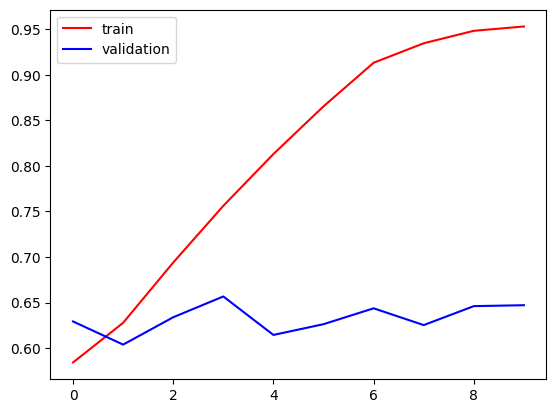

In [ ]:
# training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , color='red' , label='train')
plt.plot(history.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()
# This is showing as the Epochs are increasing , training accuracy is increasing but validation accuracy is almost constant
# We can see the gap between accuracy curve of both which shows that model is overfitting with training dataset

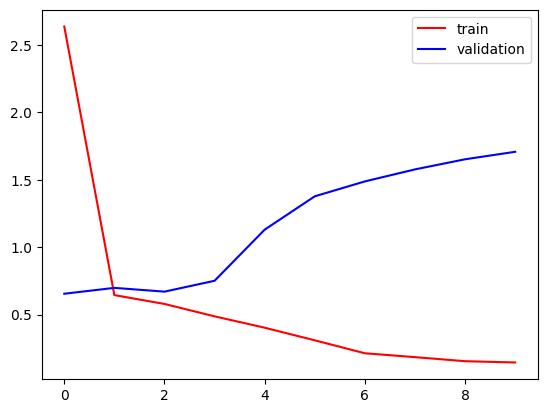

In [ ]:
# training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , color='red' , label='train')
plt.plot(history.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

In [ ]:
# To reduce overfitting , we'll use batch normalization and dropout
# There are many other methods like data augumentation , regularization , etc
from keras.layers import BatchNormalization , Dropout
model = Sequential()
# Convolutional layers
model.add(Conv2D(32,kernel_size=(3,3) , padding='valid' , activation='relu' , input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3) , padding='valid' , activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2) , strides=2 , padding='valid'))

# Flatten layer
model.add(Flatten())
# Fully connected layer with No. of neurons per layer = (128,64,1) , 1 for output layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
output = model.fit(train_data , epochs=10 , validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 86s 132ms/step - loss: 1.3969 - accuracy: 0.5739 - val_loss: 0.6251 - val_accuracy: 0.6418
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6468 - accuracy: 0.6209 - val_loss: 0.6566 - val_accuracy: 0.5796
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6088 - accuracy: 0.6750 - val_loss: 0.8110 - val_accuracy: 0.6450
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5447 - accuracy: 0.7210 - val_loss: 0.5331 - val_accuracy: 0.7352
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4864 - accuracy: 0.7610 - val_loss: 0.5006 - val_accuracy: 0.7434
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4256 - accuracy: 0.7940 - val_loss: 0.5282 - val_accuracy: 0.7408
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3965 - accuracy: 0.8148 - val_loss: 0.5429 - val_ac

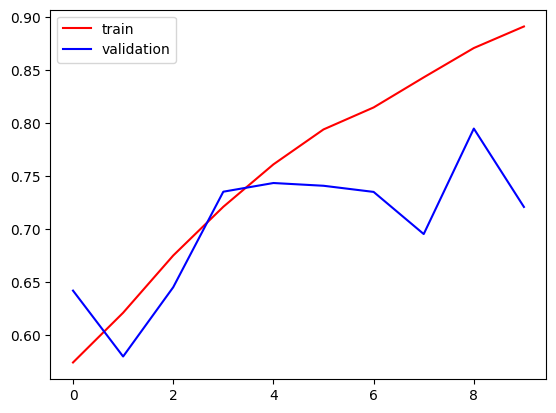

In [ ]:
# training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(output.history['accuracy'] , color='red' , label='train')
plt.plot(output.history['val_accuracy'] , color='blue' , label='validation')
plt.legend()
plt.show()

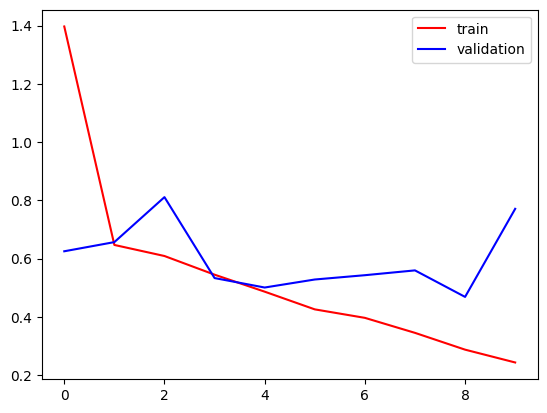

In [ ]:
# training and validation loss
import matplotlib.pyplot as plt
plt.plot(output.history['loss'] , color='red' , label='train')
plt.plot(output.history['val_loss'] , color='blue' , label='validation')
plt.legend()
plt.show()

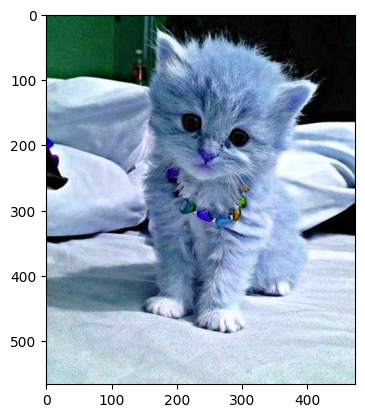

In [ ]:
# Prediction on new unseen data
import cv2 #importing openCV
test_img = cv2.imread('/content/testImage.jpeg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(567, 474, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)


1/1 [==============================] - 0s 422ms/step


array([[0.02813792]], dtype=float32)